Three ZONE 


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [36]:
df = pd.read_csv('/content/data2.csv',index_col=0)
#df2= pd.read_csv('/Testing.csv',index_col='index')
#d=pd.read_csv('/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/Notebook/data2.csv',index_col=0)



In [37]:
df.num = df.num.where(df.num < 2, 2)

In [38]:
df.num.value_counts()

0.0    396
1.0    288
2.0    236
Name: num, dtype: int64

In [39]:
df.head()

,level_0,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,255.0,0.0,63.0,1.0,1.0,145.0,233.0,0.0,2.0,150.0,0.0,2.2,3.0,0.0,3.0,0.0
1,1.0,140.0,67.0,1.0,4.0,160.0,228.0,0.0,2.0,108.0,1.0,2.5,2.0,0.0,3.0,2.0
2,2.0,2.0,67.0,1.0,4.0,120.0,229.0,1.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,3.0,3.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1.0
4,4.0,4.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [40]:
df.drop(["level_0",'index'],axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,0.0,2.0,150.0,0.0,2.2,3.0,0.0,3.0,0.0
1,67.0,1.0,4.0,160.0,228.0,0.0,2.0,108.0,1.0,2.5,2.0,0.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,1.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,71.0,0.0,0.0,2.0,1.0,3.0,1.0
916,62.0,1.0,4.0,130.0,139.0,0.0,0.0,80.0,0.0,-0.5,1.0,1.0,7.0,0.0
917,56.0,1.0,4.0,122.0,216.0,1.0,1.0,100.0,0.0,0.0,2.0,1.0,6.0,1.0
918,58.0,1.0,4.0,146.0,385.0,1.0,2.0,157.0,1.0,1.4,2.0,0.0,7.0,0.0


In [41]:
scaler =RobustScaler()
features = [['age','trestbps', 'chol', 'thalach', 'oldpeak','ca','thal']]
for feature in features:
    df[feature] = scaler.fit_transform(df[feature])

In [42]:
X = df.drop(['num'], axis=1)
#X=df.drop(['level_0','index','ca','thal'], axis=1)
y = df['num']

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state=42)

In [ ]:
#df.num = df.num.where(df.num < 3, 3)

In [43]:
oversample = SMOTE()
X_test, y_test = oversample.fit_resample(X_test, y_test)
X_train, y_train = oversample.fit_resample(X_train, y_train)

AttributeError: ignored

In [44]:
sc_X = RobustScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [47]:


estimators = [
               
               ('xgb', XGBClassifier(n_estimators=2000, eta=.1, subsample=.8, colsample_bytree=.2,eval_metric='mlogloss')),
              ('mlpc',MLPClassifier(hidden_layer_sizes=(250,150,100), max_iter=100,activation = 'relu',solver='sgd',random_state=42)),
              #('NB',GaussianNB()),
                ('knn',  KNeighborsClassifier(n_neighbors =21, metric = 'minkowski', p = 1)),
               
                ('svm', SVC(kernel='rbf',degree=5,gamma=.3,C=2,random_state=42)),
             ('ada',AdaBoostClassifier(base_estimator=SGDClassifier(loss='hinge'), algorithm='SAMME',learning_rate=1.0,n_estimators=500))
                ] 
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=5000))
clf.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.7401129943502824

In [ ]:
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Stacking1',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.613,0.622,0.615,0.749,0.747,0.746
1,Stacking1,0.621,0.628,0.623,0.713,0.713,0.712
2,Stacking1,0.632,0.640,0.633,0.728,0.725,0.723
3,Stacking1,0.642,0.645,0.642,0.734,0.733,0.731
4,Stacking1,0.644,0.647,0.643,0.737,0.736,0.735
5,Stacking1,0.615,0.620,0.616,0.749,0.747,0.746
6,Stacking1,0.612,0.621,0.614,0.749,0.747,0.746
7,Stacking1,0.642,0.645,0.642,0.734,0.733,0.731
8,Stacking1,0.609,0.615,0.611,0.749,0.747,0.746
9,Stacking1,0.611,0.618,0.613,0.753,0.747,0.747


In [ ]:
X_red1=[[65,	1,	3	,134,	276	,1,	2	,105	,1	,1.4	,1]]
X_red2=[[58,	0,	2	,130,	285	,1,	0	,115,	1	,1	,1]]
X_red3=[[57	,0	,4	,120,	253	,0	,2,	120	,1	,2.5	,2]]
X_red4=[[59,	1,	4	,132,	353	,0	,0	,132,	1,	1.2	,2]]
X_red5=[[51	,1,	3	,120,	230	,0	,2	,165,	0	,2.5,	2]]
X_red6=[[54	,0	,4,	122	,286,	0	,2,	116	,1,	3	,2]]
#X_y1=[[56,	1,	2	,110,	275,	0	,2,	118	,0,	1.2	,2]]
X_y1=[[40	,1,	4	,108,	157,	0,	0,	142,	0,	0.0,	1]]
X_g1=[[61	,0,	2,	112,	135,	0	,1,	172,	0,	0.3	,1]]
X_r1=[[38,	1,	4,	120,	218,	0,	0,	162,	1	,1.5,	2	]]
X_g2=[[43,	0	,2	,142,	207	,0,	0	,112,	0	,0,	1]]
X_g3=[[45	,0,	4	,124,	218	,0,	0	,115,	0,	0	,1]]
#X_g3=[]]

In [ ]:
scaler =RobustScaler()
features = [['age','trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df2[feature] = scaler.fit_transform(df2[feature])

In [17]:
df.head()

,level_0,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,255.0,0.0,0.692308,1.0,1.0,0.6,0.106825,0.0,2.0,0.285714,0.0,0.736842,3.0,-0.5,-0.75,0.0
1,1.0,140.0,1.000000,1.0,4.0,1.2,0.047478,0.0,2.0,-0.914286,1.0,0.894737,2.0,-0.5,-0.75,2.0
2,2.0,2.0,1.000000,1.0,4.0,-0.4,0.059347,1.0,2.0,-0.314286,1.0,0.947368,2.0,0.5,0.25,1.0
3,3.0,3.0,-1.307692,1.0,3.0,0.0,0.308605,0.0,0.0,1.342857,0.0,1.421053,3.0,-0.5,-0.75,1.0
4,4.0,4.0,-1.000000,0.0,2.0,0.0,-0.237389,0.0,2.0,0.914286,0.0,0.315789,1.0,-0.5,-0.75,0.0


In [ ]:
	[[55,	1,	3,	140,	247,	1,	2,	109,	1,	1.4,	1,	2,	2]
[58	,0,	2,	135	,187,	1	,1,	115	,1,	1	,1,	2,	2]
[	67,	0	,4	,130,	243,	0	,2,	122	,1,	2.4,	2	,2,	2]]
[61	,1,	4	,129,	343,	0,	0,	124,	1,	1.2,	2,	2,	2]
	[55	,1,	3,	123	,230,	0	,2,	165,	0,	2.3,	2	,2,	2]
	[54,	0	,4	,132,	284,	0	,2,	116,	1,	3,	2,	2,	2]
[	63,	1,	4,	140,	265,	0,	0	,113,	0	,0.8,	2,	1,	1]
[53,	0,	4	,120,	233,	0,	0,	110,	0	,0.7,	1,	1,	1]
[	54,	0	,2,	122,	204,	0,	0	,175,	0,	0	,1,	0,	0]
	62	0	2	112	125	0	1	172	0	0.2	1	0	0
[41,	1,	4	,108,	157,	0,	0,	142	,0,	0	,1,	1,	1]
[	33,	1	,4,	120,	228	,0,	0,	152	,0,	0.5	,2,	1,	1]
[48	,1,	4	,129,	217,	0,	0,	163	,1,	1.5,	2,	2,	2]
[	44,	0	,2,	137,	207	,0,	0	,112,	0,	0	,1,	0,	0]
[46	,0	,4,	124,	218,	0	,0,	115,	0	,0,	1	,0,	0]
	[23,	0,	3,	121,	150	,1,	0	,84,	0	,0.2,	2]
[23,	0,	3,	116,	140,	0,	0	,97	,0,	0	,2,	0,	0]
[	22,	1	,4,	125	,153,	0,	0,	112,	0	,0	,2]
[21,	1,	4	,107,	126	,0,	0,	102	,0,	0,	2	]
[	22,	1,	4	,119,	136,	0,	0,	114	,0,	0	,2	]

[65,1,3,138,276,1,2,105,1,1.4,1],
[58,0,2,130,185,1,0,115,1,1,1],
[57,0,4,120,253,0,2,120,1,2.5,2],
[59,1,4,132,353,0,0,132,1,1.2,2],
[51,1,3,120,230,0,2,165,0,2.5,2],
[54,0,4,122,286,0,2,116,1,3,2],
[53,1,4,100,255,0,0,103,0,0.8,2],
[63,0,4,120,233,0,0,110,0,0.7,1],
[54,0,2,120,204,0,0,174,0,0,1],
[61,0,2,112,125,0,1,172,0,0.3,1],
[40,1,4,108,157,0,0,142,0,0,1],
[32,1,4,120,228,0,0,152,0,0.5,2],
[38,1,4,120,218,0,0,162,1,1.5,2],
[43,0,2,142,207,0,0,112,0,0,1],
[45,0,4,124,218,0,0,115,0,0,1],
[23,0,3,120,150,1,0,84,0,0.2,2],
[23,0,3,115,140,0,0,97,0,0,2],
[22,1,4,98,133,0,0,112,0,0,2],
[23,0,4,107,126,0,0,102,0,0,2],
[23,1,4,119,136,0,0,114,0,0,2]


In [ ]:
X_try=[[55,	1,	3,	140,	247,	1,	2,	109,	1,	1.4,	1],
[58	,0,	2,	135	,187,	1	,1,	115	,1,	1	,1],
[	67,	0	,4	,130,	243,	0	,2,	122	,1,	2.4,	2	],
[61	,1,	4	,129,	343,	0,	0,	124,	1,	1.2,	2],
	[55	,1,	3,	123	,230,	0	,2,	165,	0,	2.3,	2	],
	[54,	0	,4	,132,	284,	0	,2,	116,	1,	3,	2],
[	63,	1,	4,	140,	265,	0,	0	,113,	0	,0.8,	2],
[53,	0,	4	,120,	233,	0,	0,	110,	0	,0.7,	1],
[	54,	0	,2,	122,	204,	0,	0	,175,	0,	0	,1],
	[62	,0,	2	,112	,125,	0,	1,	172,	0,	0.2	,1],
[41,	1,	4	,108,	157,	0,	0,	142	,0,	0	,1],
[	33,	1	,4,	120,	228	,0,	0,	152	,0,	0.5	,2],
[48	,1,	4	,129,	217,	0,	0,	163	,1,	1.5,	2],
[	44,	0	,2,	137,	207	,0,	0	,112,	0,	0	,1],
[46	,0	,4,	124,	218,	0	,0,	115,	0	,0,	1],
[23,	0,	3,	121,	150	,1,	0	,84,	0	,0.2,	2],
[23,	0,	3,	116,	140,	0,	0	,97	,0,	0	,2],
[	22,	1	,4,	125	,153,	0,	0,	112,	0	,0	,2],
[21,	1,	4	,107,	126	,0,	0,	102	,0,	0,	2	],
[	22,	1,	4	,119,	136,	0,	0,	114	,0,	0	,2	],
[65,1,3,138,276,1,2,105,1,1.4,1],
[58,0,2,130,185,1,0,115,1,1,1],
[57,0,4,120,253,0,2,120,1,2.5,2],
[59,1,4,132,353,0,0,132,1,1.2,2],
[51,1,3,120,230,0,2,165,0,2.5,2],
[54,0,4,122,286,0,2,116,1,3,2],
[53,1,4,100,255,0,0,103,0,0.8,2],
[63,0,4,120,233,0,0,110,0,0.7,1],
[54,0,2,120,204,0,0,174,0,0,1],
[61,0,2,112,125,0,1,172,0,0.3,1],
[40,1,4,108,157,0,0,142,0,0,1],
[32,1,4,120,228,0,0,152,0,0.5,2],
[38,1,4,120,218,0,0,162,1,1.5,2],
[43,0,2,142,207,0,0,112,0,0,1],
[45,0,4,124,218,0,0,115,0,0,1],
[23,0,3,120,150,1,0,84,0,0.2,2],
[23,0,3,115,140,0,0,97,0,0,2],
[22,1,4,98,133,0,0,112,0,0,2],
[23,0,4,107,126,0,0,102,0,0,2],
[23,1,4,119,136,0,0,114,0,0,2]]

In [ ]:
TestX = X_try
Testy = [2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
sc_X = RobustScaler()
TestX = sc_X.fit_transform(TestX)
#Testy = sc_X.transform(Testy)

In [ ]:
clf.score(TestX,Testy)

0.875

In [ ]:
clf.predict(X_try)

array([2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = Testy
y_pred = clf.predict(X_try)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)

ValueError: ignored

In [14]:
 from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Predict the labels of the test set samples
predicted_labels = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predicted_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


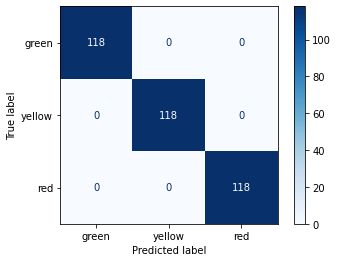

In [16]:
class_names=['green','yellow','red']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Testy,clf.predict(TestX), target_names=class_names))
              

              precision    recall  f1-score   support

       green       1.00      0.72      0.84        18
      yellow       0.62      1.00      0.76         8
         red       1.00      1.00      1.00        14

    accuracy                           0.88        40
   macro avg       0.87      0.91      0.87        40
weighted avg       0.92      0.88      0.88        40



In [ ]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
TNR

array([1.     , 0.84375, 1.     ])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_test=format(precision_score(Testy, clf.predict(TestX), average='macro'),'.3f')
recall_test=format(recall_score(Testy, clf.predict(TestX), average='macro'),'.3f')
f1_test=format(f1_score(Testy, clf.predict(TestX), average='macro'),'.3f')

In [ ]:
precision_test

'0.872'

In [ ]:
recall_test

'0.907'

In [ ]:
f1_test

'0.867'

In [ ]:
y_true = Testy
y_pred = clf.predict(X_try)

In [ ]:
T=perf_measure(y_true,y_pred)

In [ ]:
T

(4, 3, 6, 0)

In [ ]:
speci= T[2] / (T[2]+T[1])

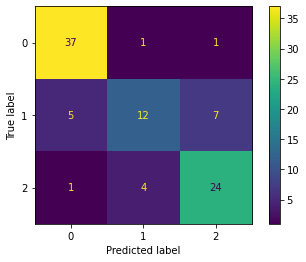

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

evaluation1 = pd.DataFrame({'Model': [],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Precision(test)':[],
                           'Recal(test)':[],
                           'F1_score(test)':[]})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 82, 97
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.test.is_gpu_available()

     |████████████████████████████████| 1.7 MB 33.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Stacking',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758


NameError: ignored

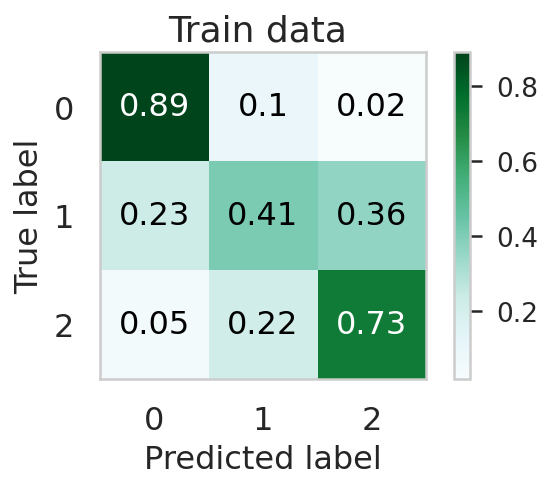

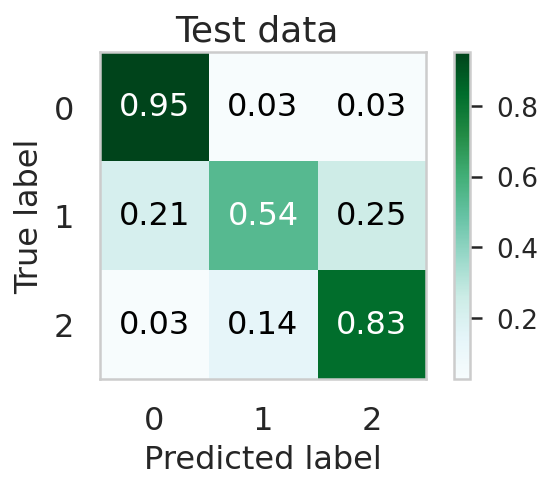

In [ ]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf1.predict(X_train)
y_score_train = pred_train
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf1.predict(X_test)
y_score_test = pred_test
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(5,3),
    title_fontsize='18',
    text_fontsize='16',
    title ='Train data ',
    cmap='BuGn',
    normalize=True
    )
plt.savefig('CM3_2-train',dpi=300);
skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(5,3),
    title_fontsize='18',
    text_fontsize='16',
    title ='Test data ',
    cmap='BuGn',

    normalize=True
    )
plt.savefig('CM3_2-test',dpi=300);
import scikitplot as skplt 
skplt.metrics.plot_confusion_matrix(Y_TRUE, Y_PRED, normalize=True)
y_train=p
y_test=q
from scipy import interp

from itertools import cycle
from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_train = [None] * len(y_train);    
for i in range(0, len(y_train)):    
    roc_y_train[i] = y_train[i]; 

from sklearn.preprocessing import label_binarize
y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
n_classes = 2
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
# y_score_test[50]=2
# roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pred_prob = clf1.predict_proba(X_test)
y_pred=clf1.predict(X_test)

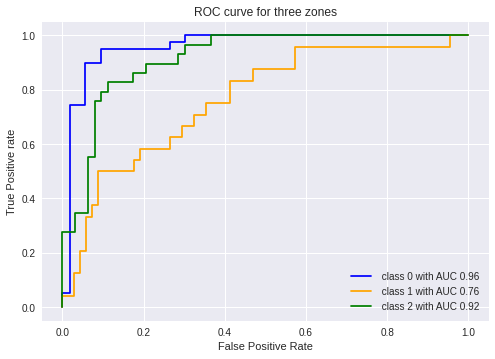

In [ ]:
#roc curve for classes
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
y=[0,1,2]
color=['blue','orange','green']

#format(a, '.2f') 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-',color=color[i], label=' class '+str(y[i])+' with AUC '+str(format(roc_auc[i],'.2f')))
    #le.inverse_transform(i)
# plotting    
#rcParams['figure.figsize'] = 61.7,97
#plt.figure(figsize=(21,17))
plt.title('ROC curve for three zones')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC3-2',dpi=300);    

In [ ]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=XGBClassifier(n_estimators=2000, eta=.1, subsample=.8, colsample_bytree=.2,eval_metric='mlogloss') ,n_estimators=10, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.6366120218579235

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from numpy import mean
from numpy import std
# define dataset

# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.649 (0.037)


In [ ]:

# example of grid searching key hyperparameters for adaboost on a classification dataset

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
# define dataset

# define the model with default hyperparameters
model = AdaBoostClassifier(base_estimator=SGDClassifier(loss='hinge'), algorithm='SAMME')
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.655797 using {'learning_rate': 0.1, 'n_estimators': 100}
0.625000 (0.027605) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.626449 (0.026400) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.625725 (0.026280) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.625725 (0.028300) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.624638 (0.028307) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.624638 (0.025834) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.626087 (0.027441) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.638043 (0.028365) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.625725 (0.025520) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.637319 (0.028550) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.652174 (0.032488) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.650725 (0.042353) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.647826 (0.035008) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.651812

In [ ]:
import pandas as pd
df=pd.read_csv('/content/data2.csv',index_col=0)

In [ ]:
X_train.shape

(828, 11)

In [ ]:
#2	
#9	59	1	4	140	203	1	2	155	1	3.1	3
#11	48	0	2	140	294	0	2	115	0	1.3	2	1
#57	1	4	150	276	0	2	112	1	0.6	2	1
	
#54	59	1	4	130	253	0	2	99	1	1.4	2	1
#55	54	1	4	124	266	0	2	109	1	2.2	2	1
#56	45	1	3	130	233	0	0	163	0	0.6	2	1
#57	51	1	4	110	0	0	0	148	0	0.0	1	1
#0	63	1	1	145	233	1	2	150	0	2.3	1

#12	56	1	3	130	220	1	2	142	1	0.6	2	0
#13	34	0	2	120	204	0	0	174	0	0.0	1	0
#14	52	1	3	172	192	1	0	162	0	0.5	1	0
#15	57	1	3	120	258	0	0	174	0	1.6	1	0
#16	48	1	2	120	246	0	0	150	0	

#X_new=[[	24	,0,	3,	120	,150,	1	,0	,84,	0	,0.2,	2]]
X_new2=[[54,	0,	2,	120,	204,	0,	0,	174,	0,	0.0,	1]]
X_new3=[[50,	1,	3	,100,	233	,0,	1	,163,	0	,0.7,	2]]
X_new4=[[63,	0,	4	,120,	233	,0,	0	,113,	0	,.7,	1]]
X_new=[[	23	,1,	4,	119	,106,	0	,0	,119,	0	,0.0,	2]]

In [ ]:
clf.predict(X_new)
#50,	1,	3	,150,	233	,0,	1	,163,	0	,0.6,	2


array([1])

In [ ]:
import numpy as np
array=np.array(10)
array1=[29,58,39,44]
array2=[122,115,108,115]
array3=[8,5,8,8]
array=[1,0,0,0]
x=np.mean(array1)
y=np.mean(array2)
z=np.mean(array3)

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
  
# Creating dataset
a = [x,y,z]
  
# Creating histogram
np.histogram(array1)
  
hist, bins = np.histogram(a) 
fig = plt.figure(figsize =(50, 67)) 
# printing histogram
print()
print (hist) 
print (bins) 
print()


[1 0 0 1 0 0 0 0 0 1]
[  7.25   18.025  28.8    39.575  50.35   61.125  71.9    82.675  93.45
 104.225 115.   ]



<Figure size 3600x4824 with 0 Axes>

NameError: ignored

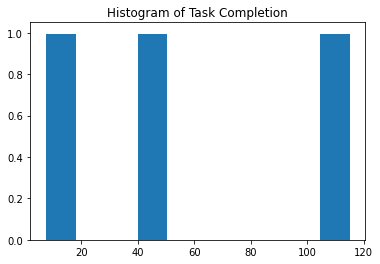

In [ ]:
fig, ax = plt.subplots()
data = np.random.rand(1000)
colors = ["#e74c3c", "#2ecc71", "#3498db"]
N, bins, patches = ax.hist(a, edgecolor='white', linewidth=1)
plt.title("Histogram of Task Completion") 
xlabel('Task3   Task2   Task1')
ylabel('Mean')
# show plot
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)
knn =knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)

In [ ]:
precision_train=format(precision_score(y_train, knn.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,knn.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,knn.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, knn.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,knn.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,knn.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['KNN',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NV = GaussianNB()
NV.fit(X_train, y_train)
y_pred = NV.predict(X_test)

In [ ]:
precision_train=format(precision_score(y_train, NV.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,NV.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,NV.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, NV.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,NV.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,NV.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Naive Bayes',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=21)
rf = rf.fit(X_train,y_train)

In [ ]:
precision_train=format(precision_score(y_train, rf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,rf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,rf.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, rf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,rf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,rf.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Random Forest',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix



svc = SVC(kernel='rbf',degree=3,C=.1,random_state=2021).fit(X_train, y_train)
y_pred = svc.predict(X_test)



In [ ]:
precision_train=format(precision_score(y_train, svc.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,svc.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,svc.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, svc.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,svc.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,svc.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Suppor Vector Machine',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
precision_train=format(precision_score(y_train, gb.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,gb.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,gb.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, gb.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,gb.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,gb.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Gradient Boosting',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625


In [ ]:
from sklearn.linear_model import SGDClassifier
#from sklearn.metrics import classification_report
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)

sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
precision_train=format(precision_score(y_train, sgdc.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,sgdc.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,sgdc.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, sgdc.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,sgdc.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,sgdc.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['SGD Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625
6,SGD Classifier,0.634,0.633,0.619,0.564,0.588,0.563


In [ ]:
xgb= XGBClassifier(n_estimators=2000, eta=.1, subsample=.7, colsample_bytree=.3,eval_metric='mlogloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.1,
              eval_metric='mlogloss', gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=2000, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

In [ ]:
precision_train=format(precision_score(y_train, xgb.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,xgb.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,xgb.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, xgb.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,xgb.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,xgb.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['XGB Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625
6,SGD Classifier,0.634,0.633,0.619,0.564,0.588,0.563
7,XGB Classifier,1.000,1.000,1.000,0.578,0.577,0.577
8,XGB Classifier,1.000,1.000,1.000,0.578,0.577,0.577


In [ ]:
mlpc=MLPClassifier(hidden_layer_sizes=(250,150,100), max_iter=100,activation = 'relu',solver='sgd',random_state=42)
mlpc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(250, 150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
precision_train=format(precision_score(y_train, mlpc.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,mlpc.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,mlpc.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, mlpc.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,mlpc.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,mlpc.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[8] = ['MLP Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625
6,SGD Classifier,0.634,0.633,0.619,0.564,0.588,0.563
7,XGB Classifier,1.000,1.000,1.000,0.578,0.577,0.577
8,MLP Classifier,0.641,0.644,0.636,0.739,0.731,0.726


In [ ]:
estimators = [
               
               ('xgb', XGBClassifier(n_estimators=2000, eta=.1, subsample=.8, colsample_bytree=.2,eval_metric='mlogloss')),
               
                ('knn',  KNeighborsClassifier(n_neighbors =21, metric = 'manhattan', p = 1)),
               ('svm', SVC(kernel='rbf',degree=2,gamma=.3,C=1,random_state=42))
                ] 
clf1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='lbfgs', max_iter=5000))

clf1.fit(X_train, y_train).score(X_test, y_test)

0.8043478260869565

In [ ]:
precision_train=format(precision_score(y_train, clf1.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf1.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf1.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, clf1.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf1.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf1.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Stacking Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625
6,SGD Classifier,0.634,0.633,0.619,0.564,0.588,0.563
7,XGB Classifier,1.000,1.000,1.000,0.578,0.577,0.577
8,MLP Classifier,0.641,0.644,0.636,0.739,0.731,0.726
9,Stacking Classifier,0.668,0.674,0.667,0.786,0.773,0.774


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train).score(X_test,y_test)

0.5869565217391305

In [ ]:
precision_train=format(precision_score(y_train, dt.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,dt.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,dt.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, dt.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,dt.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,dt.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['Decision Tree Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625
6,SGD Classifier,0.634,0.633,0.619,0.564,0.588,0.563
7,XGB Classifier,1.000,1.000,1.000,0.578,0.577,0.577
8,MLP Classifier,0.641,0.644,0.636,0.739,0.731,0.726
9,Stacking Classifier,0.668,0.674,0.667,0.786,0.773,0.774


In [ ]:
ada=AdaBoostClassifier(base_estimator=SGDClassifier(loss='hinge'), algorithm='SAMME',learning_rate=1.0,n_estimators=500)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                class_weight=None,
                                                early_stopping=False,
                                                epsilon=0.1, eta0=0.0,
                                                fit_intercept=True,
                                                l1_ratio=0.15,
                                                learning_rate='optimal',
                                                loss='hinge', max_iter=1000,
                                                n_iter_no_change=5, n_jobs=None,
                                                penalty='l2', power_t=0.5,
                                                random_state=None, shuffle=True,
                                                tol=0.001,
                                                validation_fraction=0.1,
                           

In [ ]:
precision_train=format(precision_score(y_train, ada.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,ada.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,ada.predict(X_train), average='macro'),'.3f')


precision_test=format(precision_score(y_test, ada.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,ada.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,ada.predict(X_test), average='macro'),'.3f')

r = evaluation1.shape[0]
evaluation1.loc[r] = ['AdaBoost Classifier',precision_train,recall_train,f1_train,precision_test,recall_test,f1_test]
evaluation1

,Model,Precision(train),Recall(train),F1_score(train),Precision(test),Recal(test),F1_score(test)
0,Stacking,0.655,0.663,0.656,0.772,0.759,0.758
1,KNN,0.646,0.638,0.641,0.697,0.690,0.690
2,Naive Bayes,0.627,0.632,0.628,0.685,0.679,0.681
3,Random Forest,0.996,0.994,0.995,0.645,0.645,0.644
4,Suppor Vector Machine,0.656,0.656,0.648,0.749,0.745,0.742
5,Gradient Boosting,0.865,0.859,0.862,0.624,0.625,0.625
6,SGD Classifier,0.634,0.633,0.619,0.564,0.588,0.563
7,XGB Classifier,1.000,1.000,1.000,0.578,0.577,0.577
8,MLP Classifier,0.641,0.644,0.636,0.739,0.731,0.726
9,Stacking Classifier,0.668,0.674,0.667,0.786,0.773,0.774
